# CS 109A/STAT 121A/AC 209A/CSCI E-109A  

## Lab 2: Cleaning and EDA of Goodreads 

**Harvard University**<br>
**Fall 2017**<br>
**Instructors: Pavlos Protopapas, Kevin Rader, Rahul Dave, Margo Levine**

---

# Table of Contents 
<ol start="0">
<li> Learning Goals </li>
<li> Loading and Cleaning with Pandas</li>
<li> Asking Questions?  </li>
<li> Parsing and Completing the Dataframe  </li>
<li> EDA  </li>
<li> Determining the Best Books  </li>
<li>Trends in Popularity of Genres </li>
</ol>

## Learning Goals

About 6000 odd "best books" were fetched and parsed from [Goodreads](https://www.goodreads.com). The "bestness" of these books came from a proprietary formula used by Goodreads and published as a list on their web site.

We parsed the page for each book and saved data from all these pages in a tabular format as a CSV file. In this lab we'll clean and further parse the data.  We'll then do some exploratory data analysis to answer questions about these best books and popular genres.  


By the end of this lab, you should be able to:

- Load and systematically address missing values, ancoded as `NaN` values in our data set, for example, by removing observations associated with these values.
- Parse columns in the dataframe to create new dataframe columns.
- Create and interpret visualizations to explore the data set

*This lab corresponds to lectures 2 and 3 and maps on to homework 1 and further.*

### Basic EDA workflow

(From the lecture, repeated here for convenience).

The basic workflow is as follows:

1. **Scrape**  data using beautiful soup and python request.
2. **Build** a DataFrame from the data (ideally, put all data in this object)
3. **Clean** the DataFrame. It should have the following properties:
    - Each row describes a single object
    - Each column describes a property of that object
    - Columns are numeric whenever appropriate
    - Columns contain atomic properties that cannot be further decomposed
4. Explore **global properties**. Use histograms, scatter plots, and aggregation functions to summarize the data.
5. Explore **group properties**. Use groupby and small multiples to compare subsets of the data.

This process transforms your data into a format which is easier to work with, gives you a basic overview of the data's properties, and likely generates several questions for you to followup in subsequent analysis.

## Part 1: Loading and Cleaning with Pandas 
Read in the `goodreads.csv` file, examine the data, and do any necessary data cleaning. 

Here is a description of the columns (in order) present in this csv file:

```
rating: the average rating on a 1-5 scale achieved by the book
review_count: the number of Goodreads users who reviewed this book
isbn: the ISBN code for the book
booktype: an internal Goodreads identifier for the book
author_url: the Goodreads (relative) URL for the author of the book
year: the year the book was published
genre_urls: a string with '|' separated relative URLS of Goodreads genre pages
dir: a directory identifier internal to the scraping code
rating_count: the number of ratings for this book (this is different from the number of reviews)
name: the name of the book
```

Report all the issues you found with the data and how you resolved them.  

[15 minutes]

----

## Part 1: Solution 

Loading libraries

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sn
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)

### Cleaning: Reading the data

In [2]:
#Read the data into dataframe
df = pd.read_csv("data/goodreads.csv")

#Examine
df.head()

,4.40,136455,0439023483,good_reads:book,https://www.goodreads.com/author/show/153394.Suzanne_Collins,2008,/genres/young-adult|/genres/science-fiction|/genres/dystopia|/genres/fantasy|/genres/science-fiction|/genres/romance|/genres/adventure|/genres/book-club|/genres/young-adult|/genres/teen|/genres/apocalyptic|/genres/post-apocalyptic|/genres/action,dir01/2767052-the-hunger-games.html,2958974,"The Hunger Games (The Hunger Games, #1)"
0,4.41,16648,0439358078,good_reads:book,https://www.goodreads.com/author/show/1077326....,2003.0,/genres/fantasy|/genres/young-adult|/genres/fi...,dir01/2.Harry_Potter_and_the_Order_of_the_Phoe...,1284478,Harry Potter and the Order of the Phoenix (Har...
1,3.56,85746,0316015849,good_reads:book,https://www.goodreads.com/author/show/941441.S...,2005.0,/genres/young-adult|/genres/fantasy|/genres/ro...,dir01/41865.Twilight.html,2579564,"Twilight (Twilight, #1)"
2,4.23,47906,0061120081,good_reads:book,https://www.goodreads.com/author/show/1825.Har...,1960.0,/genres/classics|/genres/fiction|/genres/histo...,dir01/2657.To_Kill_a_Mockingbird.html,2078123,To Kill a Mockingbird
3,4.23,34772,0679783261,good_reads:book,https://www.goodreads.com/author/show/1265.Jan...,1813.0,/genres/classics|/genres/fiction|/genres/roman...,dir01/1885.Pride_and_Prejudice.html,1388992,Pride and Prejudice
4,4.25,12363,0446675539,good_reads:book,https://www.goodreads.com/author/show/11081.Ma...,1936.0,/genres/classics|/genres/historical-fiction|/g...,dir01/18405.Gone_with_the_Wind.html,645470,Gone with the Wind


In [3]:
#Read and specify header
df = pd.read_csv("data/goodreads.csv", header=None,
                 names=["rating", 'review_count', 'isbn', 'booktype','author_url', 'year', 'genre_urls', 'dir','rating_count', 'name'],
)

df.head()

,rating,review_count,isbn,booktype,author_url,year,genre_urls,dir,rating_count,name
0,4.40,136455,0439023483,good_reads:book,https://www.goodreads.com/author/show/153394.S...,2008.0,/genres/young-adult|/genres/science-fiction|/g...,dir01/2767052-the-hunger-games.html,2958974,"The Hunger Games (The Hunger Games, #1)"
1,4.41,16648,0439358078,good_reads:book,https://www.goodreads.com/author/show/1077326....,2003.0,/genres/fantasy|/genres/young-adult|/genres/fi...,dir01/2.Harry_Potter_and_the_Order_of_the_Phoe...,1284478,Harry Potter and the Order of the Phoenix (Har...
2,3.56,85746,0316015849,good_reads:book,https://www.goodreads.com/author/show/941441.S...,2005.0,/genres/young-adult|/genres/fantasy|/genres/ro...,dir01/41865.Twilight.html,2579564,"Twilight (Twilight, #1)"
3,4.23,47906,0061120081,good_reads:book,https://www.goodreads.com/author/show/1825.Har...,1960.0,/genres/classics|/genres/fiction|/genres/histo...,dir01/2657.To_Kill_a_Mockingbird.html,2078123,To Kill a Mockingbird
4,4.23,34772,0679783261,good_reads:book,https://www.goodreads.com/author/show/1265.Jan...,1813.0,/genres/classics|/genres/fiction|/genres/roman...,dir01/1885.Pride_and_Prejudice.html,1388992,Pride and Prejudice


### Cleaning: Examine the dataframe - quick checks

In [4]:
#Types
df.dtypes

rating          float64
review_count     object
isbn             object
booktype         object
author_url       object
year            float64
genre_urls       object
dir              object
rating_count     object
name             object
dtype: object

In [5]:
print(df.shape)
df.columns

(6000, 10)


Index(['rating', 'review_count', 'isbn', 'booktype', 'author_url', 'year', 'genre_urls', 'dir', 'rating_count', 'name'], dtype='object')

### Cleaning: Examinine the dataframe - a deeper looks

In [7]:
# missing values in rating
df[df.rating.isnull()]

,rating,review_count,isbn,booktype,author_url,year,genre_urls,dir,rating_count,name
3643,NaN,None,None,None,None,NaN,NaN,dir37/9658936-harry-potter.html,None,None
5282,NaN,None,None,None,None,NaN,NaN,dir53/113138.The_Winner.html,None,None


In [8]:
# missing values in year
df[df.year.isnull()]

,rating,review_count,isbn,booktype,author_url,year,genre_urls,dir,rating_count,name
2442,4.23,526,NaN,good_reads:book,https://www.goodreads.com/author/show/623606.A...,NaN,/genres/religion|/genres/islam|/genres/non-fic...,dir25/1301625.La_Tahzan.html,4134,La Tahzan
2869,4.61,2,NaN,good_reads:book,https://www.goodreads.com/author/show/8182217....,NaN,NaN,dir29/22031070-my-death-experiences---a-preach...,23,My Death Experiences - A Preacherâs 18 Apoca...
3643,NaN,None,None,None,None,NaN,NaN,dir37/9658936-harry-potter.html,None,None
5282,NaN,None,None,None,None,NaN,NaN,dir53/113138.The_Winner.html,None,None
5572,3.71,35,8423336603,good_reads:book,https://www.goodreads.com/author/show/285658.E...,NaN,/genres/fiction,dir56/890680._rase_una_vez_el_amor_pero_tuve_q...,403,Ãrase una vez el amor pero tuve que matarlo. ...
5658,4.32,44,NaN,good_reads:book,https://www.goodreads.com/author/show/25307.Ro...,NaN,/genres/fantasy|/genres/fantasy|/genres/epic-f...,dir57/5533041-assassin-s-apprentice-royal-assa...,3850,Assassin's Apprentice / Royal Assassin (Farsee...
5683,4.56,204,NaN,good_reads:book,https://www.goodreads.com/author/show/3097905....,NaN,/genres/fantasy|/genres/young-adult|/genres/ro...,dir57/12474623-tiger-s-dream.html,895,"Tiger's Dream (The Tiger Saga, #5)"


### Cleaning: Dealing with Missing Values

In [9]:
# remove those with missing year
df = df[df.year.notnull()]

In [10]:
df.dtypes

rating          float64
review_count     object
isbn             object
booktype         object
author_url       object
year            float64
genre_urls       object
dir              object
rating_count     object
name             object
dtype: object

In [13]:
print(np.sum(df.year.isnull()))
print(np.sum(df.rating_count.isnull()))
print(np.sum(df.review_count.isnull()))
df.shape

0
0
0


(5993, 10)

In [14]:
# fix rating_count and review_count
df.rating_count = df.rating_count.astype(int)
df.review_count = df.review_count.astype(int)
df.year = df.year.astype(int)

In [15]:
df.dtypes

rating          float64
review_count      int64
isbn             object
booktype         object
author_url       object
year              int64
genre_urls       object
dir              object
rating_count      int64
name             object
dtype: object

In [16]:
# some columns that should be string have NaN
df.loc[df.genre_urls.isnull(), 'genre_urls'] = ""
df.loc[df.isbn.isnull(), 'isbn'] = ""

##   Part 2: Asking Questions 
Think of few questions we want to ask and then examine the data and decide if the dataframe contains what you need to address these questions. 

[5 min]

---

##  Part 3: Parsing and Completing the Data Frame 

We will need author and genre to proceed! Parse the `author` column from the author_url and `genres` column from the genre_urls. Keep the `genres` column as a string separated by '|'.

Hint: Use panda's `map` to assign new columns to the dataframe.  

[10 minutes]

---

In [34]:
# test with first author_url
test_string = df.author_url[0]
test_string

'https://www.goodreads.com/author/show/153394.Suzanne_Collins'

In [39]:
# split out some string operations to isolate the author name
test_string.split('/')[-1].split('.')[1]

'Suzanne_Collins'

In [43]:
# function that accepts an author url and return the author's name
def get_author(url):
    
    name = url.split('/')[-1].split('.')[1]
    return name

# apply get_author to the author_url column using map
# store in author column
df.author = df.author_url.map(get_author)
df.author[:5]

0    Suzanne_Collins
1        J_K_Rowling
2    Stephenie_Meyer
3         Harper_Lee
4        Jane_Austen
Name: author_url, dtype: object

In [45]:
# test with first genre_url
test_genre_string = df.genre_urls[0]
test_genre_string

'/genres/young-adult|/genres/science-fiction|/genres/dystopia|/genres/fantasy|/genres/science-fiction|/genres/romance|/genres/adventure|/genres/book-club|/genres/young-adult|/genres/teen|/genres/apocalyptic|/genres/post-apocalyptic|/genres/action'

In [56]:
# split
genres = test_genre_string.strip().split('|')
for g in genres:
    print(g.split('/')[-1])
    "|".join(genres)

young-adult
science-fiction
dystopia
fantasy
science-fiction
romance
adventure
book-club
young-adult
teen
apocalyptic
post-apocalyptic
action


In [63]:
# function that accepts a genre url and returns the genre
def split_and_join_genres(url):
    genres = url.strip().split('|')
    genres = [g.split('/')[-1] for g in genres]
    return "|".join(genres)

df['genres'] = df.genre_urls.map(split_and_join_genres)
df.genres.head()

0    young-adult|science-fiction|dystopia|fantasy|s...
1    fantasy|young-adult|fiction|fantasy|magic|chil...
2    young-adult|fantasy|romance|paranormal|vampire...
3    classics|fiction|historical-fiction|academic|s...
4    classics|fiction|romance|historical-fiction|li...
Name: genres, dtype: object

In [71]:
df[df.author == "Rick_Riordan"]

,rating,review_count,isbn,booktype,author_url,year,genre_urls,dir,rating_count,name,genres
79,4.18,31846,0786838655,good_reads:book,https://www.goodreads.com/author/show/15872.Ri...,2005,/genres/fantasy|/genres/young-adult|/genres/fa...,dir01/28187.The_Lightning_Thief.html,806465,The Lightning Thief (Percy Jackson and the Oly...,fantasy|young-adult|fantasy|mythology|fiction|...
160,4.47,11678,0739380338,good_reads:book,https://www.goodreads.com/author/show/15872.Ri...,2009,/genres/fantasy|/genres/young-adult|/genres/fa...,dir02/4502507-the-last-olympian.html,317734,The Last Olympian (Percy Jackson and the Olymp...,fantasy|young-adult|fantasy|mythology|fiction|...
188,4.36,8996,1423101464,good_reads:book,https://www.goodreads.com/author/show/15872.Ri...,2008,/genres/young-adult|/genres/fantasy|/genres/my...,dir02/2120932.The_Battle_of_the_Labyrinth.html,360183,The Battle of the Labyrinth (Percy Jackson and...,young-adult|fantasy|mythology|fiction|adventur...
193,4.20,13257,0786856866,good_reads:book,https://www.goodreads.com/author/show/15872.Ri...,2006,/genres/young-adult|/genres/fantasy|/genres/fi...,dir02/28186.The_Sea_of_Monsters.html,350206,The Sea of Monsters (Percy Jackson and the Oly...,young-adult|fantasy|fiction|fantasy|mythology|...
204,4.30,9761,0141382899,good_reads:book,https://www.goodreads.com/author/show/15872.Ri...,2007,/genres/fiction|/genres/childrens|/genres/myth...,dir03/561456.The_Titan_s_Curse.html,272457,The Titan's Curse (Percy Jackson and the Olymp...,fiction|childrens|mythology|greek-mythology|fa...
260,4.35,11228,142311339X,good_reads:book,https://www.goodreads.com/author/show/15872.Ri...,2010,/genres/fantasy|/genres/young-adult|/genres/fa...,dir03/7736182-the-lost-hero.html,281762,"The Lost Hero (The Heroes of Olympus, #1)",fantasy|young-adult|fantasy|mythology|adventur...
344,4.45,8173,1423140591,good_reads:book,https://www.goodreads.com/author/show/15872.Ri...,2011,/genres/fantasy|/genres/young-adult|/genres/fa...,dir04/9520360-the-son-of-neptune.html,199991,"The Son of Neptune (The Heroes of Olympus, #2)",fantasy|young-adult|fantasy|mythology|adventur...
400,4.53,9292,1423140605,good_reads:book,https://www.goodreads.com/author/show/15872.Ri...,2012,/genres/fantasy|/genres/young-adult|/genres/fa...,dir05/12127750-the-mark-of-athena.html,128412,"The Mark of Athena (The Heroes of Olympus, #3)",fantasy|young-adult|fantasy|mythology|adventur...
534,4.03,8095,1423113381,good_reads:book,https://www.goodreads.com/author/show/15872.Ri...,2010,/genres/fantasy|/genres/young-adult|/genres/fa...,dir06/7090447-the-red-pyramid.html,163686,"The Red Pyramid (Kane Chronicles, #1)",fantasy|young-adult|fantasy|mythology|adventur...
620,4.54,7767,1423146727,good_reads:book,https://www.goodreads.com/author/show/15872.Ri...,2013,/genres/fantasy|/genres/young-adult|/genres/fa...,dir07/12127810-the-house-of-hades.html,72082,"The House of Hades (The Heroes of Olympus, #4)",fantasy|young-adult|fantasy|mythology|adventur...


## Part 4: EDA 
Before proceeding any further, get to know the dataset using a few "global property" visualizations, illustrating histograms with both linear and log scales. Do you find anything interesting or strange? 


[10 minutes]

---

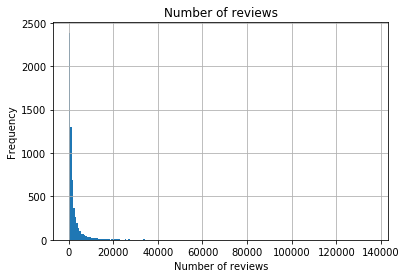

In [72]:
#Generate histograms using the format df.YOUR_CHOICE_OF_COLUMN_NAME.hist(bins=YOUR_CHOICE_OF_BIN_SIZE)

df.review_count.hist(bins=200)
plt.xlabel('Number of reviews')
plt.ylabel('Frequency')
plt.title('Number of reviews');

plt.show();

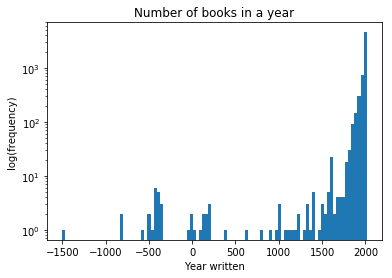

In [73]:
# log scale
plt.hist(df.year, log=True, bins=100);
plt.xlabel('Year written')
plt.ylabel('log(frequency)')
plt.title('Number of books in a year')

plt.show();


## Part 5:  Determining the Best Books 

This is an example of an analysis of the "grouped property" type.

Think of some reasonable definitions of what it could mean to be a "best book." (After all, these are all the best books according to Goodreads)

[5 minutes] 

---

## Part 6:  Trends in Popularity of Genres 

This is an example of an analysis of the "grouped property" type.

There are a lot of questions you could ask about genres.
* Which genre is currently the most popular?
* Better, based on our data, what draw conclusions can you draw about the time evolution of the popularity of each genre?

[15 minutes]

---

### Part 6.1: What can you conclude from the above visualizations?
Pick two or three genres and describe how the popularity of these genres fluctuates with time.  